In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r"C:\Users\LENOVO\Downloads\archive (15)\ds_salaries.csv")
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


# Bar Plot

### Q1. Show employee Salary with their experience

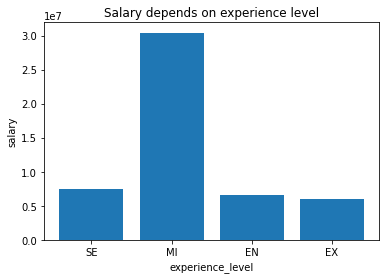

In [6]:
plt.bar(data['experience_level'],data['salary'])
plt.title('Salary depends on experience level')
plt.xlabel('experience_level')
plt.ylabel('salary')
plt.show()

# Line plot

### Q2. Which are the top 10 job titles based on mean salary, and how do their mean salaries compare?

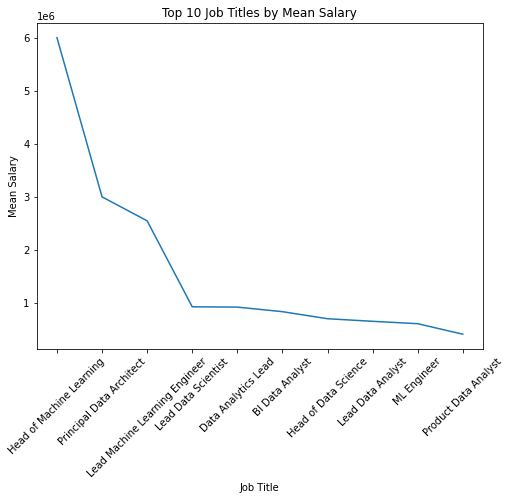

In [24]:
job_title_salary = data.groupby('job_title')['salary'].mean()

# Get the top 10 job titles with the highest mean salary
top_job_titles = job_title_salary.nlargest(10)

# Create a line graph using Matplotlib
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(top_job_titles.index, top_job_titles.values)

# Set the labels and title
ax.set_xlabel('Job Title')
ax.set_ylabel('Mean Salary')
ax.set_title('Top 10 Job Titles by Mean Salary')

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)

plt.show()

# Pie Chart

### Q.3 show top 5 Employee Residences with the highest salaries 

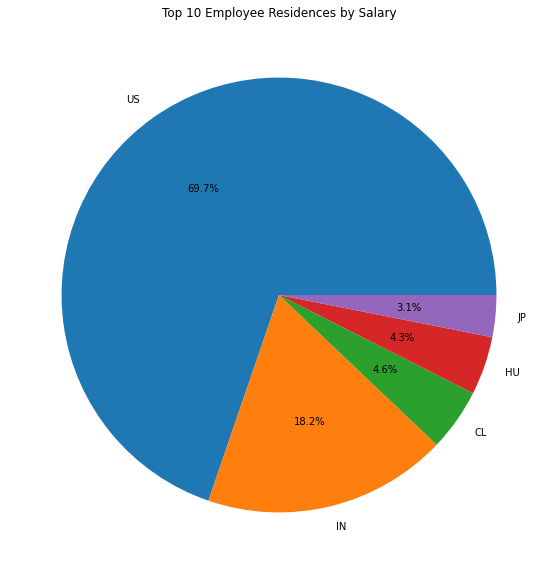

In [19]:
residence_df = data.groupby('employee_residence')['salary'].sum().reset_index()
top_residences = residence_df.sort_values('salary', ascending=False).head(5)

# Create a pie chart using Matplotlib
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(top_residences['salary'], labels=top_residences['employee_residence'], autopct='%1.1f%%')

# Set the title
ax.set_title('Top 10 Employee Residences by Salary')

plt.show()

# Donut chart

### Q4. Get the top 5 company locations with the highest number of employment type

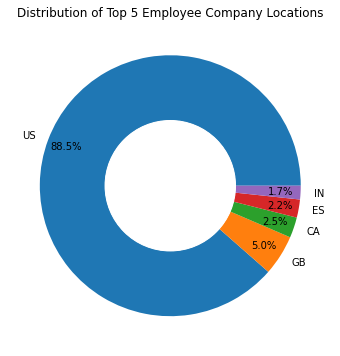

In [31]:
company_location_count = data.groupby('company_location')['employment_type'].count()

top_company_locations = company_location_count.nlargest(5)

# Create a donut chart using Matplotlib
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(top_company_locations.values, labels=top_company_locations.index, wedgeprops=dict(width=0.5), autopct='%1.1f%%', pctdistance=0.85)

# Add a circle at the center to create the donut chart
circle = plt.Circle((0,0), 0.5, color='white')
ax.add_artist(circle)

# Set the title
ax.set_title('Distribution of Top 5 Employee Company Locations')

plt.show()

# Heatmap

### Q5. Plot Correlation Heatmap Data Science Salary

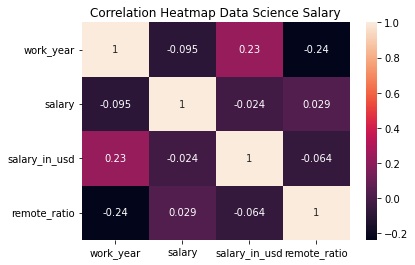

In [37]:
corr_matrix = data.corr()

# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True)

# Set the title
plt.title('Correlation Heatmap Data Science Salary')

plt.show()